In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf

In [2]:
importlib.reload(ExperimentClass)
fig, ax = plt.subplots(1,3, figsize = (12, 4))
ax[0].plot(actinic, params_df.F_max[1:], 'o-', label = 'Control')
ax[1].plot(actinic, params_df.F_stat[1:], 'o-', label = 'Control')
ax[2].plot(actinic, params_df.F_0[1:], 'o-', label = 'Control')

for axes in ax:
    axes.set_xlabel('Time under continuous low light (min)')
    axes.set_ylabel('Fluorescence (r.u.)')
    axes.legend()
ax[0].set_title('$F_{max}$')
ax[1].set_title('$F_{stat}$')
ax[2].set_title('$F_{0}$')

fig.suptitle('Fluorescence under continuous low light: 100 $µEm^{-2}s^{-1}$ green')
fig.tight_layout()
fig.savefig(fig_folder + "/Fluorescence_yield.png", dpi = 300) = ExperimentClass.Experiment("20240226_validation_WT3_control", "Fluo_Liquide")
time = (fluo_liquide.Time - fluo_liquide.Time[0])/1000


fig_folder = fluo_liquide.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)



In [3]:
[0, 25.2, 58.1, 129.6, 188.8, 266, 318.9, 548.5, 762.2, 1110.4, 1286.1, 1531.7]

[0, 25.2, 58.1, 129.6, 188.8, 266, 318.9, 548.5, 762.2, 1110.4, 1286.1, 1531.7]

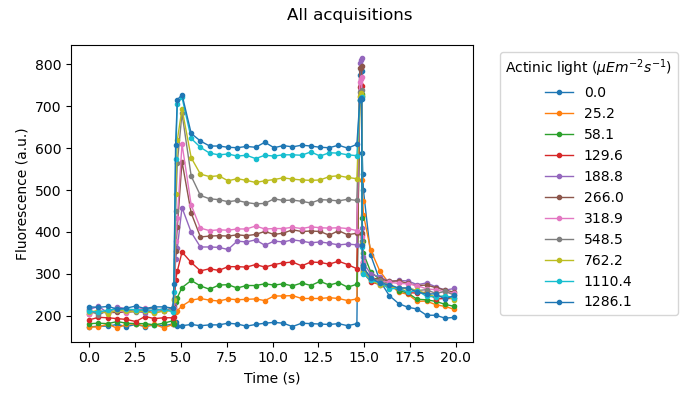

In [4]:
# visualize some acquisitions

fig, ax = plt.subplots(figsize = (7, 4))
actinic = [0, 25.2, 58.1, 129.6, 188.8, 266, 318.9, 548.5, 762.2, 1110.4, 1286.1, 1531.7]

for k, i in enumerate(fluo_liquide.Data.keys()):
    ax.plot(time , fluo_liquide.Data[i], 'o-', linewidth = 1, markersize = 3, label = f"{actinic[k]:.1f}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fluorescence (a.u.)")
ax.legend(title = "Actinic light ($µEm^{-2}s^{-1}$)", bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle("All acquisitions")
fig.tight_layout()

fig.savefig(fig_folder + "/all_acquisitions.png", dpi = 300, bbox_inches = "tight")

        


In [7]:
def compute_params(Data_df, actinic):
    
    F_max = []
    F_stat = []
    F_0 = []
    phi_stat = []
    phi_0 = []
    NPQ = []
    ETR = []

    for i, key in enumerate(Data_df.Data.keys()):
        F_max.append(np.mean(Data_df[key][33:36]))
        F_0.append(np.mean(Data_df[key][2:11]))
        F_stat.append(np.mean(Data_df[key][25:33]))
        phi_stat.append((F_max[i] - F_stat[i]) / F_max[i])
        phi_0.append((F_max[i] - F_0[i]) / F_max[i])
        NPQ.append((F_max[0] - F_max[i])/F_max[i])
        ETR.append(phi_stat[i] * int)
        
    norm = F_max[0]
    
    F_max = list(np.array(F_max)/norm)
    F_stat = list(np.array(F_stat)/norm)
    F_0 = list(np.array(F_0)/norm)
        
    params_df = pd.DataFrame({'Actinic': actinic, 'F_max': F_max, 'F_stat': F_stat, 'F_0': F_0, 'phi_stat': phi_stat, 'phi_0': phi_0, 'NPQ': NPQ, 'ETR': ETR})
    
    return params_df
    
def actinic_light_axes(ax, Acquisitions_df, params_df):
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_max, '-', linewidth = 0.5, label = 'F_max')
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_0, '-', linewidth = 0.5, label = 'F_0')
    ax[0].plot(Acquisitions_df.Actinic, params_df.F_stat, '-', linewidth = 0.5, label = 'F_stat')
    ax[0].legend()  

    ax[1].plot(Acquisitions_df.Actinic, params_df.phi_stat, '-', linewidth = 0.5, label = 'phi_stat')
    ax[1].plot(Acquisitions_df.Actinic, params_df.phi_0, '-', linewidth = 0.5, label = 'phi_0')
    ax[1].legend()

    ax[2].plot(Acquisitions_df.Actinic, params_df.NPQ, '-', linewidth = 0.5, label = 'NPQ')
    ax[2].legend()
    
    return ax
        

In [8]:
params_df = compute_params(fluo_liquide.Data, actinic)

fig, ax = plt.subplots(1,3, figsize = (12, 4))
ax[0].plot(actinic, params_df.F_max[1:], 'o-', label = 'Control')
ax[1].plot(actinic, params_df.F_stat[1:], 'o-', label = 'Control')
ax[2].plot(actinic, params_df.F_0[1:], 'o-', label = 'Control')

for axes in ax:
    axes.set_xlabel('Time under continuous low light (min)')
    axes.set_ylabel('Fluorescence (r.u.)')
    axes.legend()
ax[0].set_title('$F_{max}$')
ax[1].set_title('$F_{stat}$')
ax[2].set_title('$F_{0}$')

fig.suptitle('Fluorescence under continuous low light: 100 $µEm^{-2}s^{-1}$ green')
fig.tight_layout()
fig.savefig(fig_folder + "/Fluorescence_yield.png", dpi = 300)

AttributeError: 'DataFrame' object has no attribute 'Data'

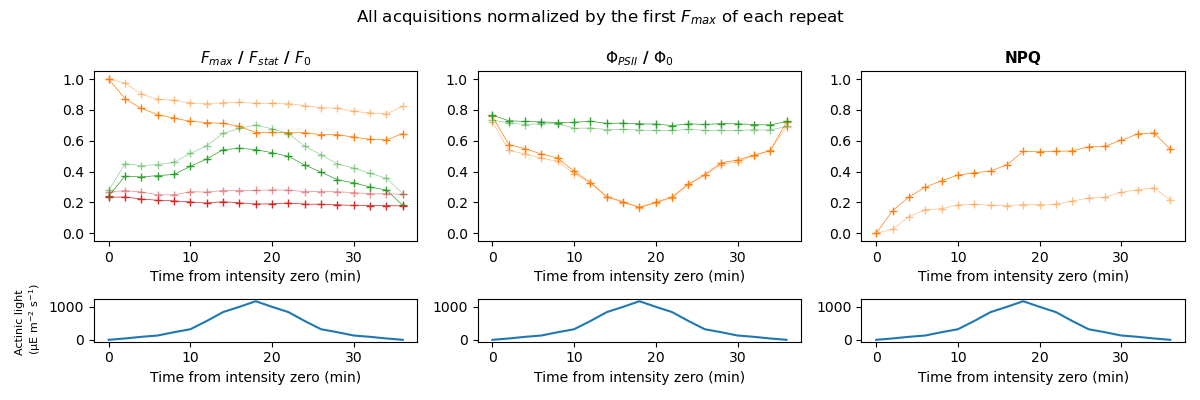

In [20]:
params_df = []
params_df.append(compute_params(fluo_liquide.Data, All_Acquisitions_df[(All_Acquisitions_df['Repeat'] == 1) & (All_Acquisitions_df['Acquisition'] == 1)]))
params_df.append(compute_params(fluo_liquide.Data, All_Acquisitions_df[(All_Acquisitions_df['Repeat'] == 2) & (All_Acquisitions_df['Acquisition'] == 1)]))

fig, ax = plt.subplots(2,3, figsize = (12,4), gridspec_kw={'height_ratios': [4, 1]})
fig.suptitle("All acquisitions normalized by the first $F_{max}$ of each repeat")

ax[0,0].plot(params_df[0].Real_time, params_df[0].F_max, '+-', linewidth = 0.5, color = 'C1', label = '$F_{max}$')
ax[0,0].plot(params_df[0].Real_time, params_df[0].F_stat, '+-', linewidth = 0.5, color = 'C2', label = '$F_{stat}$')
ax[0,0].plot(params_df[0].Real_time, params_df[0].F_0, '+-', linewidth = 0.5, color = 'C3', label = '$F_{0}$')

ax[0,0].plot(params_df[0].Real_time, params_df[1].F_max, '+-', linewidth = 0.5, color = 'C1', label = '$F_{max}$', alpha = 0.5)
ax[0,0].plot(params_df[0].Real_time, params_df[1].F_stat, '+-', linewidth = 0.5, color = 'C2', label = '$F_{stat}$', alpha = 0.5)
ax[0,0].plot(params_df[0].Real_time, params_df[1].F_0, '+-', linewidth = 0.5, color = 'C3', label = '$F_{0}$', alpha = 0.5)

ax[0,0].set_title('$F_{max}$ / $F_{stat}$ / $F_{0}$', fontsize = 11, fontweight = 'bold')


ax[0,1].plot(params_df[0].Real_time, params_df[0].phi_stat, '+-', linewidth = 0.5, label = '$Φ_{PSII}$', color = 'C1')
ax[0,1].plot(params_df[0].Real_time, params_df[0].phi_0, '+-', linewidth = 0.5, label = '$Φ_{0}$', color = 'C2')

ax[0,1].plot(params_df[0].Real_time, params_df[1].phi_stat, '+-', linewidth = 0.5, label = '$Φ_{PSII}$', color = 'C1', alpha = 0.5)
ax[0,1].plot(params_df[0].Real_time, params_df[1].phi_0, '+-', linewidth = 0.5, label = '$Φ_{0}$', color = 'C2', alpha = 0.5)

ax[0,1].set_title('$Φ_{PSII}$ / $Φ_{0}$', fontsize = 11, fontweight = 'bold')


ax[0,2].plot(params_df[0].Real_time, params_df[0].NPQ, '+-', linewidth = 0.5, label = 'NPQ', color = 'C1')

ax[0,2].plot(params_df[0].Real_time, params_df[1].NPQ, '+-', linewidth = 0.5, label = 'NPQ', color = 'C1', alpha = 0.5)

ax[0,2].set_title('NPQ', fontsize = 11, fontweight = 'bold')


for i in [0, 1, 2]:
    ax[1,i].plot(params_df[0].Real_time, params_df[0].Actinic)
    
ax[1,0].set_ylabel("Actinic light \n (µE m$^{-2}$ s$^{-1}$)", fontsize = 8)
    

ax = ax.flatten()

[ax.set_xlabel("Time from intensity zero (min)", fontsize = 10) for ax in ax]
#[ax.legend(fontsize = 8.5) for ax in ax[:3]]
[ax.set_ylim(-0.05,1.05) for ax in ax[:3]]

ax = ax.reshape(2,3)

fig.tight_layout()

fig.savefig(fig_folder + "/all_acq_time_2norm.png", dpi = 300)



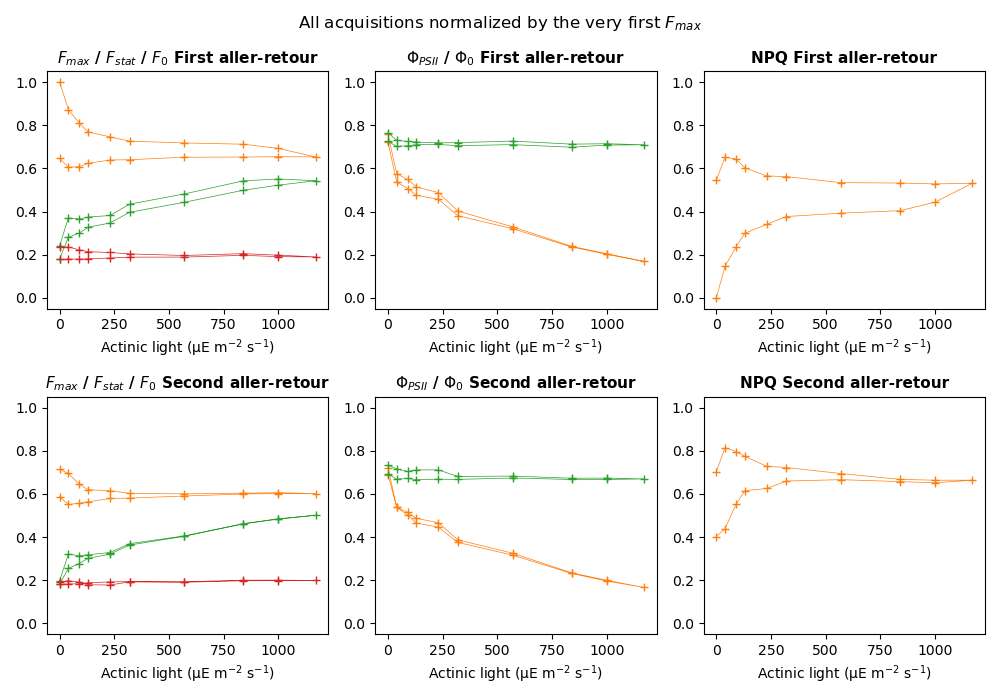

In [21]:
params_df = []
params_df.append(compute_params(fluo_liquide.Data, All_Acquisitions_df[(All_Acquisitions_df['Acquisition'] == 1)]))

fig, ax = plt.subplots(2,3, figsize = (10,7))
fig.suptitle("All acquisitions normalized by the very first $F_{max}$")

ax[0,0].plot(params_df[0].Actinic[:19], params_df[0].F_max[:19], '+-', linewidth = 0.5, color = 'C1', label = '$F_{max}$')
ax[0,0].plot(params_df[0].Actinic[:19], params_df[0].F_stat[:19], '+-', linewidth = 0.5, color = 'C2', label = '$F_{stat}$')
ax[0,0].plot(params_df[0].Actinic[:19], params_df[0].F_0[:19], '+-', linewidth = 0.5, color = 'C3', label = '$F_{0}$')

ax[1,0].plot(params_df[0].Actinic[19:], params_df[0].F_max[19:], '+-', linewidth = 0.5, color = 'C1', label = '$F_{max}$', alpha = 1)
ax[1,0].plot(params_df[0].Actinic[19:], params_df[0].F_stat[19:], '+-', linewidth = 0.5, color = 'C2', label = '$F_{stat}$', alpha = 1)
ax[1,0].plot(params_df[0].Actinic[19:], params_df[0].F_0[19:], '+-', linewidth = 0.5, color = 'C3', label = '$F_{0}$', alpha = 1)

ax[0,0].set_title('$F_{max}$ / $F_{stat}$ / $F_{0}$ First aller-retour', fontsize = 11, fontweight = 'bold')
ax[1,0].set_title('$F_{max}$ / $F_{stat}$ / $F_{0}$ Second aller-retour', fontsize = 11, fontweight = 'bold')


ax[0,1].plot(params_df[0].Actinic[:19], params_df[0].phi_stat[:19], '+-', linewidth = 0.5, label = '$Φ_{PSII}$', color = 'C1')
ax[0,1].plot(params_df[0].Actinic[:19], params_df[0].phi_0[:19], '+-', linewidth = 0.5, label = '$Φ_{0}$', color = 'C2')

ax[1,1].plot(params_df[0].Actinic[19:], params_df[0].phi_stat[19:], '+-', linewidth = 0.5, label = '$Φ_{PSII}$', color = 'C1', alpha = 1)
ax[1,1].plot(params_df[0].Actinic[19:], params_df[0].phi_0[19:], '+-', linewidth = 0.5, label = '$Φ_{0}$', color = 'C2', alpha = 1)

ax[0,1].set_title('$Φ_{PSII}$ / $Φ_{0}$ First aller-retour', fontsize = 11, fontweight = 'bold')
ax[1,1].set_title('$Φ_{PSII}$ / $Φ_{0}$ Second aller-retour', fontsize = 11, fontweight = 'bold')


ax[0,2].plot(params_df[0].Actinic[:19], params_df[0].NPQ[:19], '+-', linewidth = 0.5, label = 'NPQ', color = 'C1')

ax[1,2].plot(params_df[0].Actinic[19:], params_df[0].NPQ[19:], '+-', linewidth = 0.5, label = 'NPQ', color = 'C1', alpha = 1)

ax[0,2].set_title('NPQ First aller-retour', fontsize = 11, fontweight = 'bold')
ax[1,2].set_title('NPQ Second aller-retour', fontsize = 11, fontweight = 'bold')

ax = ax.flatten()
    
[ax.set_xlabel("Actinic light (µE m$^{-2}$ s$^{-1}$)", fontsize = 10) for ax in ax]
[ax.set_ylim(-0.05,1.05) for ax in ax]

fig.tight_layout()

fig.savefig(fig_folder + "/histerese_1norm.png", dpi = 300)



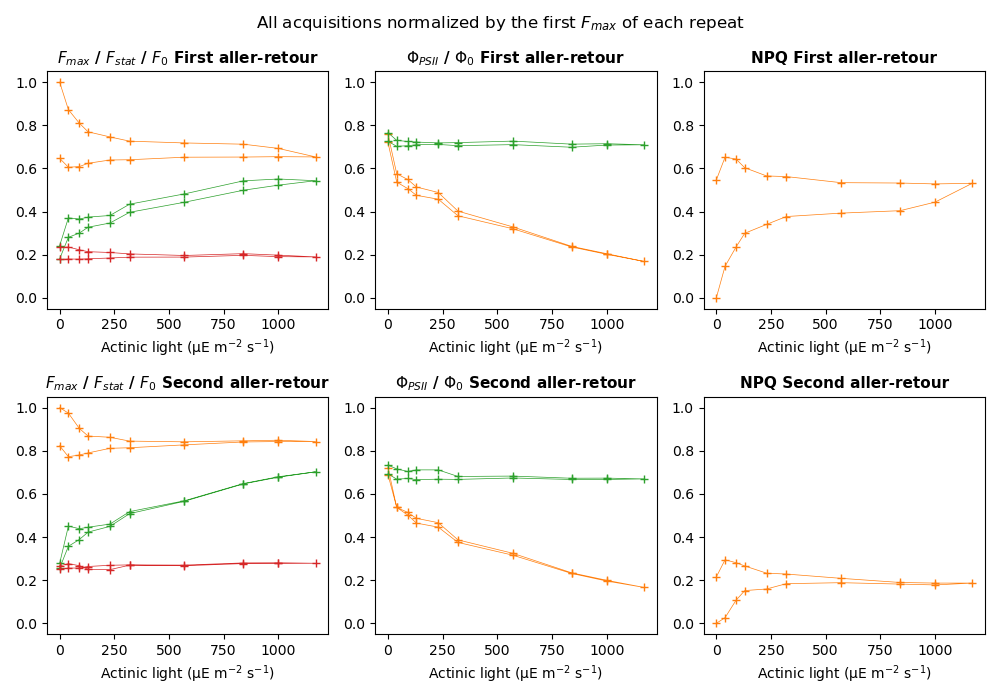

In [22]:
params_df = []
params_df.append(compute_params(fluo_liquide.Data, All_Acquisitions_df[(All_Acquisitions_df['Repeat'] == 1) & (All_Acquisitions_df['Acquisition'] == 1)]))
params_df.append(compute_params(fluo_liquide.Data, All_Acquisitions_df[(All_Acquisitions_df['Repeat'] == 2) & (All_Acquisitions_df['Acquisition'] == 1)]))

fig, ax = plt.subplots(2,3, figsize = (10,7))
fig.suptitle("All acquisitions normalized by the first $F_{max}$ of each repeat")

ax[0,0].plot(params_df[0].Actinic, params_df[0].F_max, '+-', linewidth = 0.5, color = 'C1', label = '$F_{max}$')
ax[0,0].plot(params_df[0].Actinic, params_df[0].F_stat, '+-', linewidth = 0.5, color = 'C2', label = '$F_{stat}$')
ax[0,0].plot(params_df[0].Actinic, params_df[0].F_0, '+-', linewidth = 0.5, color = 'C3', label = '$F_{0}$')

ax[1,0].plot(params_df[0].Actinic, params_df[1].F_max, '+-', linewidth = 0.5, color = 'C1', label = '$F_{max}$', alpha = 1)
ax[1,0].plot(params_df[0].Actinic, params_df[1].F_stat, '+-', linewidth = 0.5, color = 'C2', label = '$F_{stat}$', alpha = 1)
ax[1,0].plot(params_df[0].Actinic, params_df[1].F_0, '+-', linewidth = 0.5, color = 'C3', label = '$F_{0}$', alpha = 1)

ax[0,0].set_title('$F_{max}$ / $F_{stat}$ / $F_{0}$ First aller-retour', fontsize = 11, fontweight = 'bold')
ax[1,0].set_title('$F_{max}$ / $F_{stat}$ / $F_{0}$ Second aller-retour', fontsize = 11, fontweight = 'bold')


ax[0,1].plot(params_df[0].Actinic, params_df[0].phi_stat, '+-', linewidth = 0.5, label = '$Φ_{PSII}$', color = 'C1')
ax[0,1].plot(params_df[0].Actinic, params_df[0].phi_0, '+-', linewidth = 0.5, label = '$Φ_{0}$', color = 'C2')

ax[1,1].plot(params_df[0].Actinic, params_df[1].phi_stat, '+-', linewidth = 0.5, label = '$Φ_{PSII}$', color = 'C1', alpha = 1)
ax[1,1].plot(params_df[0].Actinic, params_df[1].phi_0, '+-', linewidth = 0.5, label = '$Φ_{0}$', color = 'C2', alpha = 1)

ax[0,1].set_title('$Φ_{PSII}$ / $Φ_{0}$ First aller-retour', fontsize = 11, fontweight = 'bold')
ax[1,1].set_title('$Φ_{PSII}$ / $Φ_{0}$ Second aller-retour', fontsize = 11, fontweight = 'bold')


ax[0,2].plot(params_df[0].Actinic, params_df[0].NPQ, '+-', linewidth = 0.5, label = 'NPQ', color = 'C1')

ax[1,2].plot(params_df[0].Actinic, params_df[1].NPQ, '+-', linewidth = 0.5, label = 'NPQ', color = 'C1', alpha = 1)

ax[0,2].set_title('NPQ First aller-retour', fontsize = 11, fontweight = 'bold')
ax[1,2].set_title('NPQ Second aller-retour', fontsize = 11, fontweight = 'bold')

ax = ax.flatten()
    
[ax.set_xlabel("Actinic light (µE m$^{-2}$ s$^{-1}$)", fontsize = 10) for ax in ax]
[ax.set_ylim(-0.05,1.05) for ax in ax]

fig.tight_layout()

fig.savefig(fig_folder + "/histerese_2norm.png", dpi = 300)



TypeError: 'numpy.float64' object is not iterable

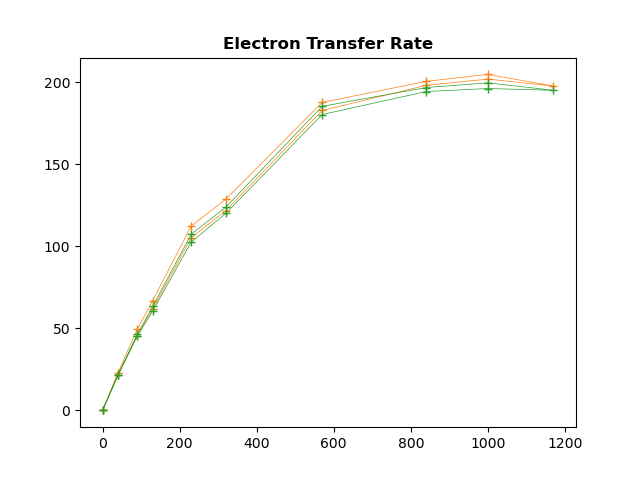

In [23]:
params_df = []
params_df.append(compute_params(fluo_liquide.Data, All_Acquisitions_df[(All_Acquisitions_df['Repeat'] == 1) & (All_Acquisitions_df['Acquisition'] == 1)]))
params_df.append(compute_params(fluo_liquide.Data, All_Acquisitions_df[(All_Acquisitions_df['Repeat'] == 2) & (All_Acquisitions_df['Acquisition'] == 1)]))
params_df.append(compute_params(fluo_liquide.Data, All_Acquisitions_df[(All_Acquisitions_df['Acquisition'] == 1)]))



fig, ax = plt.subplots()
ax.set_title("Electron Transfer Rate", fontweight = 'bold')
ax.plot(params_df[0].Actinic, params_df[0].ETR, '+-', linewidth = 0.5, label = 'ETR first aller-retour', color = 'C1')
ax.plot(params_df[0].Actinic, params_df[1].ETR, '+-', linewidth = 0.5, label = 'ETR second aller-retour', color = 'C2')

popt, pcov, xfit, yfit = tools.Ek_fit(params_df[2].Actinic, params_df[2].ETR, 0, 1200, 50, p0 = [200, 200])
err = np.array([tools.my_err(x, popt, pcov, mf.Ek) for x in xfit])

ax.fill_between(xfit, yfit - err, yfit + err, alpha=0.05, color = 'k')
ax.plot(xfit, yfit, '--', color ='k', linewidth = 1)
Ek = popt[1]
Ek_err = np.sqrt(np.diag(pcov))[1]
ax.annotate("", xy=(Ek, ax.get_ylim()[0]), xytext=(Ek, ax.get_ylim()[1]), arrowprops=dict(arrowstyle="->", color="red", linewidth = 0.5))
ax.fill_betweenx(ax.get_ylim(), Ek - Ek_err, Ek + Ek_err, color='red', alpha=0.05)
ax.text(Ek + 10, 0.05, f"$E_k$ = {Ek:.0f} ± {Ek_err:.0f} µE$m^{{-2}} s^{{-1}}$", fontsize = 10, color = "red")

ax.legend()  
ax.set_xlabel("Actinic light (µE m$^{-2}$ s$^{-1}$)")
ax.set_ylabel("ETR/σ (u. a.)")

fig.savefig(fig_folder + "/ETR.png", dpi = 300)

In [24]:
for i in dir(fluo_liquide):
    if not i[0].startswith('_'):
        print(i)
    

AllData
Data
DataType
Time
annotations
average_recordings
clean_data
clean_times
equipment
extract_recording
fig_folder
get_all_sub_experiments
get_annotations
get_keys_list
is_sub_experiment
local
name
parent_experiment_name
path
records
sub_experiments


In [25]:
def get_data_table(Data_df, Acquisitions_df):
    
    possible_act = sorted(list(set(Acquisitions_df.Actinic)))
    
    F_max_avg = []
    F_stat_avg = []
    F_0_avg = []
    
    F_max = []
    F_stat = []
    F_0 = []
    
    index = []
    experimental_point = []

    for i, k in enumerate(Acquisitions_df.Record):
        F_max_avg.append(np.mean(Data_df[f"E{k}"][33:36]))
        F_0_avg.append(np.mean(Data_df[f"E{k}"][2:11]))
        F_stat_avg.append(np.mean(Data_df[f"E{k}"][25:33]))
        
        F_max.append(np.mean(Data_df[f"E{k}"][35]))
        F_0.append(np.mean(Data_df[f"E{k}"][0]))
        F_stat.append(np.mean(Data_df[f"E{k}"][32]))
        
        if Acquisitions_df.Repeat[i] == 1:
            if Acquisitions_df.Direction[i] == -1:
                index.append("2")
            else:
                index.append("1")
        else:
            if Acquisitions_df.Direction[i] == -1:
                index.append("4")
            else:
                index.append("3")
        
        if Acquisitions_df.Acquisition[i] == 1:
            index[i] = index[i] + "A"
        else:
            index[i] = index[i] + "B"
            
        experimental_point.append(possible_act.index(Acquisitions_df.Actinic[i]))
    
    nb_cells = [None for i in range(len(F_max))]
                

        
    data_table = pd.DataFrame({'Experimental_point': experimental_point, 'Real_time': Acquisitions_df.Real_time,'Actinic_intensity': Acquisitions_df.Actinic, 'Experimental_index': index , 'nb_cells': nb_cells, 'F0': F_0, 'FS': F_stat , 'F0_avg': F_0_avg, 'FS_avg': F_stat_avg, 'FM': F_max,'FM_avg': F_max_avg})
    
    return data_table

In [26]:
data_table = get_data_table(fluo_liquide.Data, All_Acquisitions_df)
data_table.to_csv(fluo_liquide.path + "/standard_data_table.csv", index = False)

In [27]:
data_table

,Experimental_point,Real_time,Actinic_intensity,Experimental_index,nb_cells,F0,FS,F0_avg,FS_avg,FM,FM_avg
0,0,0.00,0,1A,None,596.0,693.0,662.222222,684.125,2829.0,2829.000000
1,0,0.25,0,1B,None,635.0,692.0,677.111111,683.000,2794.0,2786.000000
2,1,2.00,40,1A,None,570.0,1048.0,666.555556,1048.875,2471.0,2468.000000
3,1,2.25,40,1B,None,618.0,979.0,652.888889,1000.000,2460.0,2458.666667
4,2,4.00,90,1A,None,580.0,1033.0,630.222222,1033.375,2303.0,2290.333333
...,...,...,...,...,...,...,...,...,...,...,...
71,2,78.25,90,4B,None,516.0,714.0,534.444444,736.500,1597.0,1591.666667
72,1,80.00,40,4A,None,461.0,707.0,516.888889,720.875,1568.0,1558.666667
73,1,80.25,40,4B,None,517.0,656.0,529.777778,661.125,1566.0,1563.666667
74,0,82.00,0,4A,None,454.0,513.0,509.666667,516.125,1660.0,1661.000000


In [29]:
real_time = data_table["Real_time"]
real_time.to_csv("real_time.csv")

In [ ]:
Microspeedzen_intensities = [0, 65,	96,	150, 210, 310, 440, 600, 830, 1120,	830, 600, 310, 210, 150, 96, 65, 0, 0,	65, 96,	150, 210, 310, 440,	600, 830, 1120,	830, 600, 440, 310, 210, 150, 96, 65, 0]
folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/Validation_croise/"
file = "Microspeedzen_sum_cells.csv"

Microspeedzen_df = pd.read_csv(folder + file, sep = ";")
Microspeedzen_df


,Time,0,1,2,3,4,5,6,7,8,...,28,29,30,31,32,33,34,35,36,37
0,260.195,-0.049993,0.076158,0.081512,0.035895,0.045361,0.041775,0.039406,0.051936,0.061339,...,0.066787,0.021161,0.018543,0.066676,0.046053,0.022109,0.066281,0.057574,0.027401,0.049829
1,510.335,-0.010096,-0.016907,-0.016361,-0.005746,-0.010743,-0.018623,-0.003738,-0.022301,0.020487,...,0.006369,-0.017404,-0.060851,0.006892,-0.025360,-0.042968,0.031211,0.008048,-0.027417,0.043895
2,760.475,0.001501,0.004032,-0.001416,0.003820,-0.019409,0.028575,0.027274,0.014484,-0.020198,...,0.046595,-0.034236,-0.021844,0.000398,0.008957,-0.018644,0.031255,-0.020739,0.031010,0.024312
3,1010.615,0.026040,0.018760,0.011826,0.000440,0.011493,0.005338,-0.007003,-0.033394,0.001875,...,0.011884,-0.029845,-0.017748,0.005960,-0.000585,0.013699,0.002890,0.010312,-0.016862,0.018319
4,1260.755,0.008873,-0.012879,0.003007,0.017757,-0.017877,-0.009641,0.023635,-0.017611,0.023865,...,0.031330,0.016650,-0.020794,-0.018871,-0.028004,-0.014357,0.003003,-0.016700,-0.003803,-0.006251
5,1510.895,0.010217,-0.003444,-0.013909,-0.005014,0.032231,-0.025675,0.009309,-0.011871,-0.006784,...,-0.010546,0.012647,-0.005909,0.011366,0.003698,-0.010430,0.020918,-0.017231,-0.007309,-0.022306
6,1761.035,0.053745,-0.029719,-0.012899,-0.028517,-0.012472,0.025635,-0.045266,0.012034,-0.004416,...,-0.017333,0.023917,0.018724,-0.001629,-0.000529,-0.001112,-0.041191,-0.013935,-0.012671,-0.023801
7,2011.175,-0.016728,0.006679,-0.042796,-0.022496,0.005478,0.003668,-0.015363,0.008498,-0.032685,...,-0.011854,-0.008658,0.014447,-0.002976,0.008243,0.006425,-0.039791,-0.036751,0.010837,-0.026077
8,2261.315,-0.009675,-0.008999,0.000285,-0.004120,0.000085,-0.027351,-0.006771,-0.019750,0.001591,...,-0.048319,0.006913,0.035647,-0.033482,-0.012456,0.016799,-0.043840,0.005692,-0.017830,-0.042009
9,2511.455,-0.013882,-0.033681,-0.009247,0.007980,-0.034146,-0.023702,-0.021483,0.017976,-0.045075,...,-0.074913,0.008855,0.039786,-0.034335,-0.000017,0.028478,-0.030737,0.023730,0.016645,-0.015911


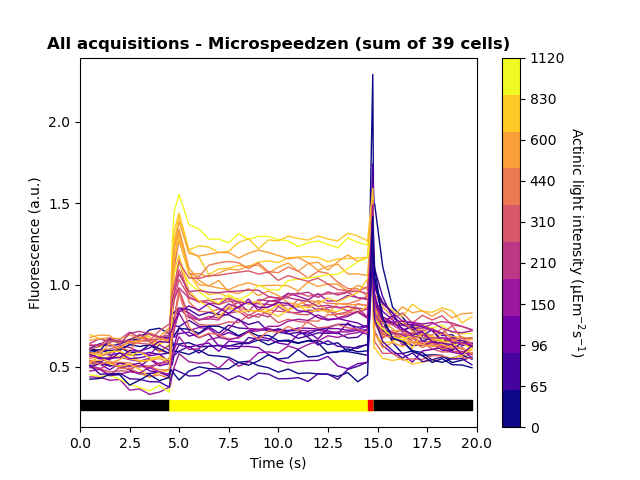

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

fig, ax = plt.subplots()
act = sorted(list(set(Microspeedzen_intensities[0:10])))
cmap = plt.cm.get_cmap('plasma', len(act))

for i, k in enumerate(Microspeedzen_df.columns):
    if k == "Time":
        time = (Microspeedzen_df[k][11:] - Microspeedzen_df[k][10])/1000
    else:
        y = Microspeedzen_df[k][11:]
        ax.plot(time , y,  linewidth = 1, color = cmap(act.index(Microspeedzen_intensities[i-1])), label = Microspeedzen_intensities[i-1])

# add cmap legend
sm = ScalarMappable(norm=colors.Normalize(vmin=0, vmax=len(act)-1), cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=range(len(act)))
cbar.ax.set_yticklabels([f'{val}' for val in act])
cbar.ax.set_ylabel('Actinic light intensity (µEm$^{-2}$s$^{-1}$)', rotation=270, labelpad=15)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Fluorescence (a.u.)')
ax.set_title(f'All acquisitions - Microspeedzen (sum of 39 cells)', fontweight = 'bold')

aux_time = np.linspace(0, max(time), 1000)
scale = max(y) - min(y)
up = min(y) - scale*0.09
down = up - scale*0.06
ax.fill_between(aux_time, down, up, color='black', where=np.logical_or.reduce((aux_time < 4.5, np.logical_and(aux_time > 14.75, aux_time < 26), aux_time > 36)))
ax.fill_between(aux_time, down, up, color='yellow', where= ~np.logical_or.reduce((aux_time < 4.5, np.logical_and(aux_time > 14.75, aux_time < 26), aux_time > 35.5)))
ax.fill_between(aux_time, down, up, color='red', where= np.logical_or.reduce((np.logical_and(aux_time > 14.5, aux_time < 14.75), np.logical_and(aux_time > 35.5, aux_time < 35.8) )))
ax.set_xlim(0,20)

fig.savefig(folder + "/all_acq_microspeedzen.png", dpi = 300)
